### Student Name : Jabez Magomere
### Student N.o. : 91279

In [48]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt


In [10]:
data = pd.read_csv("data.csv")

In [11]:
data.head()

,V1,V2
0,2.072345,-3.241693
1,17.936710,15.784810
2,1.083576,7.319176
3,11.120670,14.406780
4,23.711550,2.557729


In [12]:
data.describe()

,V1,V2
count,3000.000000,3000.000000
mean,40.611358,22.862141
std,25.859054,31.759714
min,-22.495990,-38.795500
25%,18.462790,-4.003494
50%,41.552210,13.827390
75%,62.249480,55.729100
max,104.376600,87.313700


#### 1.Visualize the data using a scatter plot.  From the plot determine an appropriate value of k.

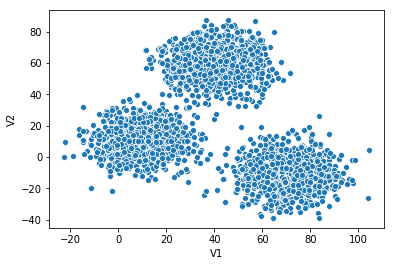

In [13]:
sns.scatterplot(x="V1",y="V2",data=data)

#### The appropriate value for k, i.e. the number of clusters is 3. The scatter plot visualizes three sort of distinct clusters

#### 2.Create multiple kMeans models from sklearn library using the values of k from 1 to 10

In [78]:
sse = {}
for i in range(1,11):
    kmeans = KMeans(n_clusters=i,random_state=0,max_iter=1000).fit(data)
    print(" Centroids K=",i,"\n",kmeans.cluster_centers_,"\n")
    sse[i] = kmeans.inertia_


 Centroids K= 1 
 [[40.61135842 22.86214103]] 

 Centroids K= 2 
 [[ 69.49144971 -10.10803707]
 [ 26.97904841  38.42510047]] 

 Centroids K= 3 
 [[ 69.92418447 -10.11964119]
 [ 40.68362784  59.71589274]
 [  9.4780459   10.686052  ]] 

 Centroids K= 4 
 [[ 69.92418447 -10.11964119]
 [ 48.38980073  59.93652114]
 [  9.43391214  10.63898036]
 [ 32.10293593  59.36915905]] 

 Centroids K= 5 
 [[ 61.72209593 -10.13065093]
 [ 48.13340973  59.66325939]
 [  9.34361229  10.67783947]
 [ 78.56796046 -10.04775307]
 [ 31.78831061  59.67227949]] 

 Centroids K= 6 
 [[ 78.63561484 -10.3916271 ]
 [ 31.73827374  61.12077468]
 [  1.60415345   7.28907473]
 [ 47.93996618  58.75127696]
 [ 16.90246481  13.99239019]
 [ 61.94893133  -9.87064002]] 

 Centroids K= 7 
 [[ 61.9336416  -10.30764781]
 [ 45.44040267  50.27607077]
 [  1.47883001   7.33488314]
 [ 29.82105653  60.75445266]
 [ 46.77256916  67.62841561]
 [ 78.60312976  -9.98070124]
 [ 16.71462468  13.71772383]] 

 Centroids K= 8 
 [[ 61.81895393 -18.035183

#### 3. Calculate the within sum of squares for each value of k

In [53]:
sse

{1: 5030433.09612008,
 2: 2309985.389168787,
 3: 611605.880693389,
 4: 535518.1622600756,
 5: 468821.94480128866,
 6: 407889.21128116804,
 7: 358378.9897803719,
 8: 311597.22686033626,
 9: 272993.2246014073,
 10: 250900.32870759297}

#### 4. Use the value in 3 above to determine the most suitable value for k using the elbow method

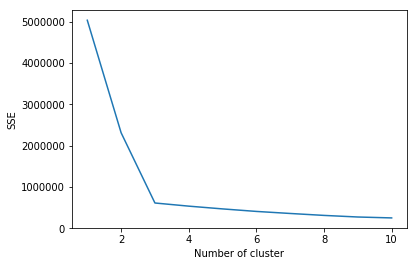

In [54]:
plt.figure()
plt.plot(list(sse.keys()), list(sse.values()))
plt.xlabel("Number of cluster")
plt.ylabel("SSE")
plt.show()

#### Using the elbow method, 3 is the optimal number of clusters.

#### 5. Use the k above to create a final kMeans model using the sklearn library

In [56]:
finalKmeans = KMeans(n_clusters=3,max_iter=1000,random_state=0).fit(data)

#### 6. Visualize the clusters from 5 above using a scatter plot. Ensure to show the clusters, their centroids and assignment of each point to a cluster. 

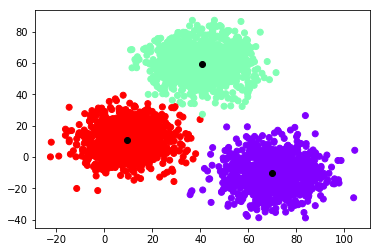

In [61]:
plt.scatter(data.V1,data.V2,c=finalKmeans.labels_,cmap='rainbow')
plt.scatter(finalKmeans.cluster_centers_[:,0] ,finalKmeans.cluster_centers_[:,1], color='black')  